The goal of this applet is to calculate lines that are simultaneously tangent to two circles.  
A vector geometry approach is used, so all lines are represented using point, unit vector pairs $\left(\mathring{p},\hat{v}\right)$, and all circles are represented by center, radius pairs $\left(\mathring{c},r\right)$.

Let $C_1$ be the circle defined by center $\mathring{c}_1$ and radius $r_1$, and $C_2$ the circle defined by center $\mathring{c}_2$ and radius $r_2$.
Take $D_c=\text{norm}(\mathring{c}_2-\mathring{c}_1)$ as the distance between $\mathring{c}_2$ and $\mathring{c}_1$.  
Also define the center axis to be the unit vector $\hat{u}$ parallel to the line $\overline{\mathring{c}_2 \mathring{c}_1}$ and oriented from $\mathring{c}_1$ to $\mathring{c}_2$.

The set of tangent lines $\mathcal{L}$ will depend on the relative configuration of $C_1$ and $C_2$, which can be resolved as follows:

<IPython.core.display.Latex object>

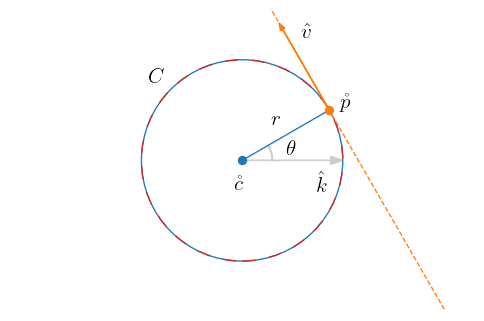

In [101]:
# Degenerate case calculuation and plot cell

# Clears all variables without confirming
%reset -f   

# Plot formatting variables
PlotLimMargin=1.5

import numpy as np, scipy as sp, matplotlib.pyplot as plt
from IPython.display import display, Latex
from numpy.linalg import norm
from scipy.spatial.transform import Rotation as R
from numpy import append as A
plt.rc('text',usetex=True)

display(Latex(r"""
Degenerate case  
$C_1$ coincides with $C_2$  $\implies$  $(0=D_c)<(r_1=r_2)$.  
As such, denote, for either circle, it's center, radius, and the circle itself, as simply $\mathring{c},\: r,\: C$, respectively.
   
Take $\theta$ to be some angle, with some unit vector $\hat{k}$ as reference, to indicate $\mathring{p} \in C$  
The set of tangent lines is then: $\mathcal{L}=\{         
        \left(\mathring{p},\hat{v}\right) = \left(\; \mathring{c} + r \hat{k} \angle \theta,\;\;  \hat{k} \angle (\theta+90°) \;\right)  \mid \theta \in \R        
\}$

"""))
# Geometric parameters
c1=np.array([0,0]); r1=1                            # Circle 1 definition
C1=plt.Circle(c1,r1, fill=False, color='tab:blue')
c2=np.array([0,0]); r2=1                            # Circle 2 definition
C2=plt.Circle(c2,r2, fill=False, color='tab:red',linestyle=(0, (10, 10)))
ang=30*np.pi/180                                    # Radius display angle
angles=np.arange(0,ang,np.pi/180,dtype=float)               
p=np.array([np.cos(ang),np.sin(ang)]*r1)+c1[1]      # Radius line / circle intersection point
v=np.array([-p[1],p[0]])


# Figure setup
figd, axd = plt.subplots(figsize=(600/96, 400/96), dpi=96); axd.cla()
XLim=[np.minimum(c1[0]-r1*PlotLimMargin,c2[0]-r2*PlotLimMargin),np.maximum(c1[0]+r1*PlotLimMargin,c2[0]+r2*PlotLimMargin)]
YLim=[np.minimum(c1[1]-r1*PlotLimMargin,c2[1]-r2*PlotLimMargin),np.maximum(c1[1]+r1*PlotLimMargin,c2[1]+r2*PlotLimMargin)]
axd.axis('equal'); axd.set_xlim(XLim); axd.set_ylim(YLim); 
axd.spines['top'].set_visible(False)
axd.spines['right'].set_visible(False)
axd.spines['bottom'].set_visible(False)
axd.spines['left'].set_visible(False)
axd.get_xaxis().set_ticks([])
axd.get_yaxis().set_ticks([])

# Drawings                                              
axd.arrow(c1[0],c1[1],1,0,                                              # k
        head_width=0.08,color=(0.8,0.8,0.8),             
        length_includes_head=True)                       
axd.annotate(r'$ \hat{k} $', xy=[0.8,-0.15],                            # k label
        xycoords='data', fontsize=16, 
        ha ='center', va='top')             
aux=np.array([np.cos(ang/2),np.sin(ang/2)])*r1*0.5+c1[1]        
axd.plot(np.cos(angles)*r1*0.3+c1[0], np.sin(angles)*r1*0.3+c1[1],      # Angle indicator arc
        color=(0.8,0.8,0.8))                             
axd.annotate(r'$ \theta $', xy=aux, xycoords='data',                    # Angle label
        fontsize=16, ha ='center', va='center_baseline')
axd.plot(c1[0],c1[1],'o',color='tab:blue')                              # Center point
axd.annotate(r'$ \mathring{c} $', xy=c1+[0,-0.15],                      # Center label        
        xycoords='data', fontsize=16, 
        ha ='center', va='top')             
axd.plot([c1[0],p[0]],[c1[1],p[1]],color='tab:blue',linewidth=1)        # Radius line
axd.annotate(r'$ r $',                                                  # Radius label
        xy=(p-c1)*0.5+v*0.2, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')
axd.add_patch(C1)                                                       # C1
axd.add_patch(C2)                                                       # C2
axd.annotate(r'$ C $',                                                  # Circle label
        xy=np.array([np.cos(3*np.pi/4),np.sin(3*np.pi/4)])*r1*1.2+c1[1], 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')

axd.plot(p[0],p[1],'o',color='tab:orange')                              # p
axd.annotate(r'$ \mathring{p} $',                                       # p label
        xy=p+np.array([np.cos(ang),np.sin(ang)])*0.2,                          
        xycoords='data', fontsize=16, 
        ha ='center', va='center_baseline')             
axd.arrow(p[0],p[1],v[0],v[1],                                          # v
        head_width=0.05,color='tab:orange',
        length_includes_head=True)                      
axd.annotate(r'$ \hat{v} $',                                            # v label
        xy=p+0.8*v+np.array([np.cos(ang),np.sin(ang)])*0.2,                          
        xycoords='data', fontsize=16, 
        ha ='center', va='center_baseline')             
axd.plot([p[0]+5*v[0],p[0]-5*v[0]],                                     # Tangent line
        [p[1]+5*v[1],p[1]-5*v[1]],
        color='tab:orange',linestyle='--',linewidth=1)               

plt.show(figd)

<IPython.core.display.Latex object>

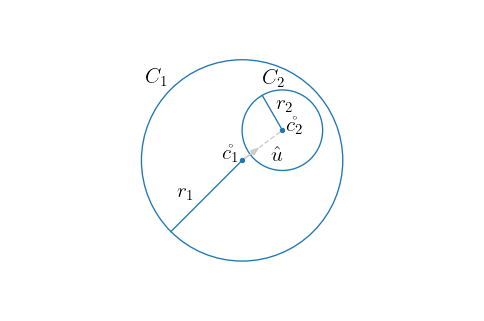

In [139]:
# Case 0 calculuation and plot cell

# Clears all variables without confirming
%reset -f   

# Plot formatting variables
PlotLimMargin=1.5

import numpy as np, scipy as sp, matplotlib.pyplot as plt
from IPython.display import display, Latex
from numpy.linalg import norm
from scipy.spatial.transform import Rotation as R
from numpy import append as A
plt.rc('text',usetex=True)


display(Latex(r"""
Case 0:   
One circle inside the other, no intersections $\implies$ $0 \leq D_c<|r_2-r_1|$.  
  
No lines tangent to one circle can be tangent to the other, because the circles don't touch.  
        $
        \mathcal{L}=\varnothing
        $
"""))
# Geometric parameters
c1=np.array([4,3]); r1=5                            # Circle 1 definition
C1=plt.Circle(c1,r1, fill=False, color='tab:blue')
c2=np.array([6,9/2]); r2=2                          # Circle 2 definition
C2=plt.Circle(c2,r2, fill=False, color='tab:blue')
u=(c2-c1)/norm(c2-c1)


# Figure setup
fig0, ax0 = plt.subplots(figsize=(600/96, 400/96), dpi=96); ax0.cla()
XLim=[np.minimum(c1[0]-r1*PlotLimMargin,c2[0]-r2*PlotLimMargin),np.maximum(c1[0]+r1*PlotLimMargin,c2[0]+r2*PlotLimMargin)]
YLim=[np.minimum(c1[1]-r1*PlotLimMargin,c2[1]-r2*PlotLimMargin),np.maximum(c1[1]+r1*PlotLimMargin,c2[1]+r2*PlotLimMargin)]
ax0.axis('equal'); ax0.set_xlim(XLim); ax0.set_ylim(YLim)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])

# Drawings

aux = r1*R.from_euler('z',5*np.pi/4).apply([1,0,0])
aux2= (R.from_euler('z',np.pi/2).apply(aux))[0:2]; aux=aux[0:2]
ax0.arrow(c1[0],c1[1],u[0],u[1],                        # u
        head_width=0.25,color=(0.8,0.8,0.8),             
        length_includes_head=True)                       
ax0.annotate(r'$ \hat{u} $',                            # u label
        xy=c1+u*0.7*norm(c2-c1)+aux2*0.1, xycoords='data',   
        fontsize=16, ha ='center', va='top')             
ax0.plot([c1[0],c2[0]],[c1[1],c2[1]],                   # Center line
        color=(0.8,0.8,0.8),linestyle='--',linewidth=1)    
ax0.plot(c1[0],c1[1],'o',color='tab:blue',ms=3)         # Center point c1
ax0.annotate(r'$ \mathring{c_1} $', xy=c1+[-0.6,0.8],   # Center point c1 label     
        xycoords='data', fontsize=16, 
        ha ='center', va='top')             
ax0.plot([c1[0],c1[0]+aux[0]],[c1[1],c1[1]+aux[1]],     # Radius line r1
        color='tab:blue',linewidth=1)    
ax0.annotate(r'$ r_1 $',                                # Radius line r1 label
        xy=c1+0.6*aux-0.2*aux2, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')

ax0.plot(c2[0],c2[1],'o',color='tab:blue',ms=3)         # Center point c2
ax0.annotate(r'$ \mathring{c_2} $', xy=c2+[0.6,0],      # Center point c2 label     
        xycoords='data', fontsize=16, 
        ha ='center', va='baseline')             
aux = r2*R.from_euler('z',2*np.pi/3).apply([1,0,0])
aux2= (R.from_euler('z',np.pi/2).apply(aux))[0:2]; aux=aux[0:2]
ax0.plot([c2[0],c2[0]+aux[0]],[c2[1],c2[1]+aux[1]],     # Radius line r2
        color='tab:blue',linewidth=1)    
ax0.annotate(r'$ r_2 $',                                # Radius line r2 label
        xy=c2+0.6*aux-0.4*aux2, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')
aux = c2-c1
aux2= (R.from_euler('z',-np.pi/2).apply(A(aux,0)))[0:2]
ax0.add_patch(C1)                                       # Circle 1
ax0.annotate(r'$ C_1 $',                                # Circle 1 label 
        xy=np.array([np.cos(3*np.pi/4),np.sin(3*np.pi/4)])*r1*1.2+c1, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')
ax0.add_patch(C2)                                       # Circle 2
ax0.annotate(r'$ C_2 $',                                # Circle 2 label 
        xy=np.array([np.cos(1.1*np.pi/2),np.sin(1.1*np.pi/2)])*r2*1.35+c2, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')

plt.show(fig0)

<IPython.core.display.Latex object>

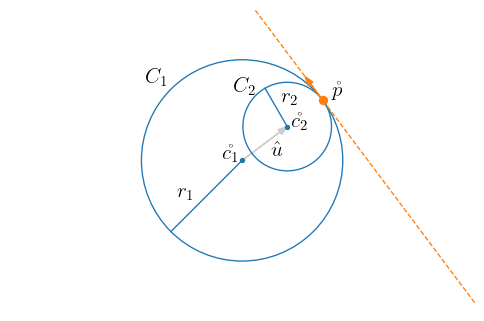

In [124]:
# Case 1 calculuation and plot cell

# Clears all variables without confirming
%reset -f   

# Plot formatting variables
PlotLimMargin=1.5

import numpy as np, scipy as sp, matplotlib.pyplot as plt
from IPython.display import display, Latex
from numpy.linalg import norm
from scipy.spatial.transform import Rotation as R
from numpy import append as A
plt.rc('text',usetex=True)


display(Latex(r"""
Case 1:   
One circle inside the other, one intersection $\implies$ $0<(D_c=|r_2-r_1|)$  
"""))
# Geometric parameters
c1=np.array([4,3]); r1=5                            # Circle 1 definition
C1=plt.Circle(c1,r1, fill=False, color='tab:blue')
c2=np.array([6.24,4.68]); r2=2.2                    # Circle 2 definition
C2=plt.Circle(c2,r2, fill=False, color='tab:blue')

"""Calculate the tangent line
If r1>r2, P will be on the positive side of u.
Conversely, if r1<r2, P will be on the negative side of u
"""
u=(c2-c1)/norm(c2-c1)
if r1>r2: p=c1+u*r1
else: p=c2-u*r2
v=[-u[1],u[0]]                                            


# Figure setup
fig1, ax1 = plt.subplots(figsize=(600/96, 400/96), dpi=96)
XLim=[np.minimum(c1[0]-r1*PlotLimMargin,c2[0]-r2*PlotLimMargin),np.maximum(c1[0]+r1*PlotLimMargin,c2[0]+r2*PlotLimMargin)]
YLim=[np.minimum(c1[1]-r1*PlotLimMargin,c2[1]-r2*PlotLimMargin),np.maximum(c1[1]+r1*PlotLimMargin,c2[1]+r2*PlotLimMargin)]
ax1.axis('equal'); ax1.set_xlim(XLim); ax1.set_ylim(YLim)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

# Drawings
ax1.plot(c1[0],c1[1],'o',color='tab:blue',ms=3)         # Center point c1
ax1.annotate(r'$ \mathring{c_1} $', xy=c1+[-0.6,0.8],   # Center point c1 label     
        xycoords='data', fontsize=16, 
        ha ='center', va='top')             
aux = r1*R.from_euler('z',5*np.pi/4).apply([1,0,0])
aux2= (R.from_euler('z',np.pi/2).apply(aux))[0:2]; aux=aux[0:2]
ax1.plot([c1[0],c1[0]+aux[0]],[c1[1],c1[1]+aux[1]],     # Radius line r1
        color='tab:blue',linewidth=1)    
ax1.annotate(r'$ r_1 $',                                # Radius line r1 label
        xy=c1+0.6*aux-0.2*aux2, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')

ax1.plot(c2[0],c2[1],'o',color='tab:blue',ms=3)         # Center point c2
ax1.annotate(r'$ \mathring{c_2} $', xy=c2+[0.6,0],      # Center point c2 label     
        xycoords='data', fontsize=16, 
        ha ='center', va='baseline')             
aux = r2*R.from_euler('z',2*np.pi/3).apply([1,0,0])
aux2= (R.from_euler('z',np.pi/2).apply(aux))[0:2]; aux=aux[0:2]
ax1.plot([c2[0],c2[0]+aux[0]],[c2[1],c2[1]+aux[1]],     # Radius line r2
        color='tab:blue',linewidth=1)    
ax1.annotate(r'$ r_2 $',                                # Radius line r2 label
        xy=c2+0.6*aux-0.4*aux2, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')
aux = c2-c1
aux2= (R.from_euler('z',-np.pi/2).apply(A(aux,0)))[0:2]
ax1.arrow(c1[0],c1[1],(c2-c1)[0],(c2-c1)[1],            # u
        head_width=0.3,color=(0.8,0.8,0.8),             
        length_includes_head=True)                       
ax1.annotate(r'$ \hat{u} $', xy=c1+aux*0.7+aux2*0.1,    # u label
        xycoords='data', fontsize=16, 
        ha ='center', va='top')             
ax1.add_patch(C1)                                       # Circle 1
ax1.annotate(r'$ C_1 $',                                # Circle 1 label 
        xy=np.array([np.cos(3*np.pi/4),np.sin(3*np.pi/4)])*r1*1.2+c1, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')
ax1.add_patch(C2)                                       # Circle 2
ax1.annotate(r'$ C_2 $',                                # Circle 2 label 
        xy=np.array([np.cos(3*np.pi/4),np.sin(3*np.pi/4)])*r2*1.35+c2, 
        xycoords='data', fontsize=16, ha ='center', va='center_baseline')

ax1.plot(p[0],p[1],'o',color='tab:orange')              # p
ax1.annotate(r'$ \mathring{p} $',                       # p label
        xy=p+u*1,                          
        xycoords='data', fontsize=16, 
        ha ='center', va='center_baseline')             
ax1.arrow(p[0],p[1],v[0],v[1],                          # v
        head_width=0.3,color='tab:orange')             
ax1.plot([p[0]+8*v[0],p[0]-15*v[0]],                    # Tangent line
        [p[1]+8*v[1],p[1]-15*v[1]],
        color='tab:orange',linestyle='--', linewidth=1)              

plt.show(fig1)